# Introduction

For the past week you have been learning about new Python libraries: `numpy` and `pandas`. Up until now, we haven't talked too much about what makes these libraries useful. Yeah, `numpy` is good for vectorizing computations, and `pandas` is good for loading and manipulating data. But are those tasks ends, in and of themselves, or means to an end? 

The answer, as with many of our answers, is, it that depends. You've already seen both libraries used independently of any particular, larger task. Tonight that changes. Tonight we will use these libraries in an effort to accomplish the same end as [Pinky and the Brain](https://en.wikipedia.org/wiki/Pinky_and_the_Brain)! Ok, maybe be won't be trying to take over the world (... or will we?). However, we will be working on just as lofty an endeavour -  predicting the unknown.

### Types of Learning

In the realm of Data Science, we talk about two distinct types of learning from data - [supervised](https://en.wikipedia.org/wiki/Supervised_learning) and [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning). **Unsupervised learning** consists of trying to find structure in your data that holds meaningful information. Today, we are going to be focusing on **supervised learning**. This brand of learning attempts to build a model that predicts a target outcome from known inputs. This is accomplished by using inputs with known targets to train the model. For example, say I'm trying to predict whether or not there will be a traffic jam on the highway. Data to solve this problem might have inputs such as the day of the week, the time of day, whether or not it's a holiday, if there is a major event going on that day, etc., and a target of whether or not there was a traffic jam. Once the model is trained, I can then predict if there's going to be a traffic jam or not by plugging the desired inputs into the model. 

This is an example of what is known as a **binary classification** problem - the binary comes from deciding yes or no on traffic jam. Binary is just the simplest case of a **classification problems**, though. Classification problems can tackle situations where you are trying to predict if inputs cause something to be in any of `n` classes. We will look at an example of this later with the Iris data set.

We don't always want to classify something as a target for our predictions, though. Frequently we want predict how much of something will happen based on inputs. This type of problem is know as **regression**. An example of this is trying to predict the price of a stock at the end of a day based on how the market behaved that day. Here, we aren't trying to classify the stock into a group, but instead want a prediction for it's price. These values can take on any number on the real line.

### Types of Models

Today we are going to get a taste for both classification and regession problems. The models that we're going to use in the examples are linear models - logistic and linear regression. These might sound simplistic, but they are far from it. Both of these types of models are the grandparents of all statistical models and are a great place to start your journey towards learning about the great wide world of modeling. In addition, we will be using the `sklearn` library. This library also has models that go well beyond the realm of linear. And because of class polymorphism, the way that you will interact with most `sklearn` model classes will be very similar to what you see in lecture today. Almost universally, there is both a `regression` and a `classification` version of the models found in `sklearn`. So, much of what you learn today will be applicable in a much larger scope than you may currently realize.

# Classification Problems

As mentioned above, classification problems enter us into a realm where we want to predict what class something is in based on some inputs. To accomplish this, we are going to want some data. Thank goodness we know how to load that stuff up. We are going to be working with the famous [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set today, which is located in the `sklearn.datasets` module. We'll take a look at the data now by starting with the data description (this comes with the data) and the data's shape. 

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data.data.shape)
print(iris_data.DESCR)

(150, 4)
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ==

Ok, the description has a lot of information. But we could have gotten most of it, as well a better feel for the data, if it were in a `DataFrame`. Let's load it up into one! The names of the data columns are stored in the `feature_names` (features are a common name used to refer to inputs) attribute on the `iris_data` object, and the classes are stored in the `target_names` attribute. We will use some of `numpy`'s powerful features to pass along the data in `iris_data` to the `DataFrame` constructor. This will allow us to see and manipulate the data more easily. Let's also take a look at some of the summary statistics.

In [3]:
import pandas as pd
import numpy as np

target_names = iris_data.target_names[iris_data.target]
column_names = [name[:-5].replace(' ', '_') for name in iris_data.feature_names]
iris_df = pd.DataFrame(iris_data.data, columns=column_names)
iris_df['target'] = iris_data.target
iris_df['label'] = target_names
iris_df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
label           150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Beyond the summary statistics, let's take a quick look at our data by plotting some of it. Here, we're going to use a scatter plot of `sepal_length` vs `sepal_width` and color by the `label`. You'll easily be able to see that one of the classes is very different from the other two.

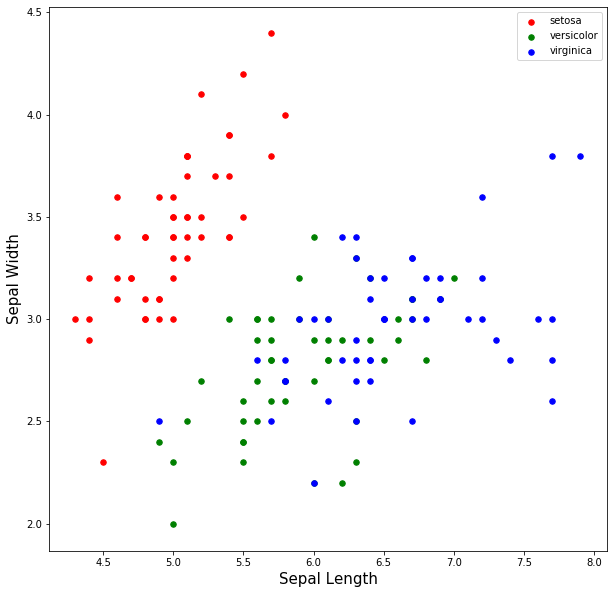

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(iris_df.target.unique(), ['r', 'g', 'b']):
    sub_df = iris_df.query('target == @target')
    ax.scatter(x=sub_df.sepal_length.values, y=sub_df.sepal_width.values, 
               color=color, label=iris_data.target_names[target], s=30)
ax.legend(loc='best')
ax.set_xlabel('Sepal Length', size=15)
ax.set_ylabel('Sepal Width', size=15);

It seems that a model might have a good chance at being able to distinguish between classes based solely on sepal length and width (adding in petal length and width is only going to make that better). We almost always want to do more EDA than we've done here, but that isn't the focus of tonight's lecture. To try and predict the class of an unknown flower with known measurements, we are going to use logistic regression. This is a standard linear based model used for classification problems. We are going to import the [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model from `sklearn`, and then feed our features and associated labels to an instance of it via the `fit()` method.

In [7]:
from sklearn.linear_model import LogisticRegression

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df.label.values
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

You can see that all we had to do to set up our model was create an instance of the `LogisticRegression` class and then call the `fit()` method on it, passing that method the features and their associated targets. Here, we stored the features and targets in the variables `X` and `y`, respectively (this is common notation).

Now, we can see what our model would predict if it saw data with an unknown label. What would we predict for a flower with `sepal length = 4.5`, `sepal_width = 3.3`, `petal_length = 1.6` and `petal_width = 0.2`? To find out, we can use the predict method on our newly fitted model! We'll see that it thinks it's a "Setosa". It turns out that our fitted model will also accept a 2-dimensional array and hand back preditions for each row in this array.

In [8]:
print('Model guess for single point: {}'.format(logistic_model.predict(np.array([[4.5, 3.3, 1.6, 0.2]]))[0]))
logistic_model.predict(np.array([[7.2, 2.8, 6.6, 2], [6.2, 2.5, 3.6, 2], [4.7, 3.6, 1.9, .1]]))

Model guess for single point: setosa


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In fact, now we can see what our model would predict for all of the values that we have! In addition, we can see how good it is at predicting with the `score()` method.

In [11]:
preds = logistic_model.predict(X)

In [10]:
logistic_model.score(X, y)

0.96

In [16]:
from sklearn.metrics import accuracy_score, recall_score

accuracy_score(preds, y), recall_score(preds, y, average='weighted')

(0.96, 0.96)

In [12]:
[print(x,y) for x,y in zip(preds, y)]

setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor ver

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

To use the `score()` method, we pass it some data points and their associated labels. In this case, we'll use all of our data. The model then predicts what class it thinks each data point belongs to, and then compares it to the actual label. The number that we get back is the percent of labels that the model predicted correctly. We call this metric the **accuracy**.

This is an incredibly high score! But we did use all of the data that we scored on to train the model. For this reason, we refer to this as the **training** accuracy. Frequently, we want to see how our model would perform on new data. One way that we can do that is by only using a portion of the data for training, and using the remaining for testing. Let's see what that would look like. To make our job easier, we're going to import another function from `sklearn`.

### use sklearn's module to split the data into train and test sets

In [20]:
from sklearn.model_selection import train_test_split

test_pcnt = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pcnt, random_state=2)

### investigate the shapes of the split dataset

In [21]:
print(f'Train/test split: test set = {test_pcnt * 100}% of dataset')
print('\nX shapes')
for x, l in zip([X,X_train,X_test],['X','X_train','X_test']):
    print(f'{l}: {x.shape}')
    
print('\ny shapes')
for x, l in zip([y,y_train,y_test],['y','y_train','y_test']):
    print(f'{l}: {x.shape}')

Train/test split: test set = 50.0% of dataset

X shapes
X: (150, 4)
X_train: (75, 4)
X_test: (75, 4)

y shapes
y: (150,)
y_train: (75,)
y_test: (75,)


### train the model on the training set and test the model's accuracy on the test set

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
acc_score = logistic_model.score(X_test, y_test)
print(f'accuracy = {round(acc_score, 3)}')

accuracy = 0.96


/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/drewthayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Here, we are using `train_test_split()` to divide our `X` features and `y` labels into two groups, while ensuring that the features and labels stay matched up. Be default, `train_test_split()` makes the train set ~75% of the data points and the test set the remaining ~25%. You can control these percents if you'd like - check out the [docs](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to see how.

This time around, we can see that our accuracy score is worse. But, the model is being tested on data points that are completely unknown to it, unlike before. For this reason we refer to this metric as the **out-of-sample** accuracy. And 87% is pretty good!

# Regression Problems

As discussed in the introduction, regression problems enter us into a realm where we want to predict a continuous value based on some inputs. To accomplish this, we are going to want some data with a taget that is continuous. Let's turn to the `Boston` data set to do this. Just as with the `Iris` data set, it is located in the `sklearn.datasets` module. As before, let's take a look the data set's description, and then load it into a `dataframe`.

In [23]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
column_names = [name.lower() for name in boston_data.feature_names]
boston_df = pd.DataFrame(boston_data.data, columns=column_names)
boston_df['medv'] = boston_data.target
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Again, let's take a quick look at some of the data with a visual. And again, we should not consider this minor exploration into the data to suffice as EDA. We are simply looking for some idea to motivate if we can predict the median value of a home based off of the features provided in the data set. Then, we're going to move on to modeling.

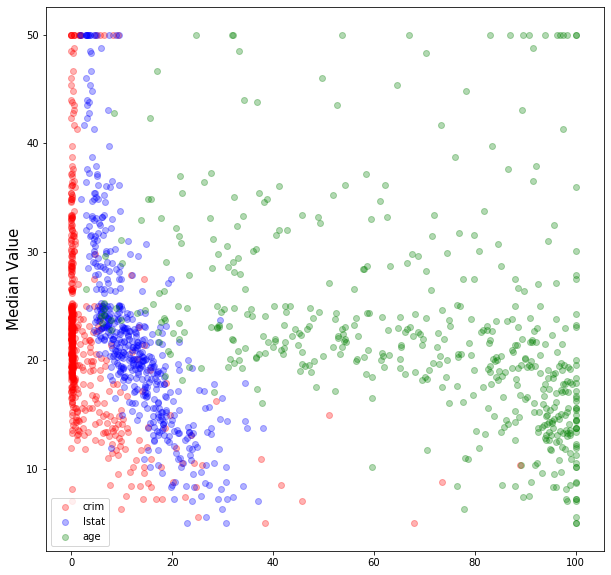

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for feature, color in zip(['crim', 'lstat', 'age'], ['r', 'b', 'g']):
    ax.scatter(x=boston_df[feature].values, y=boston_df.medv.values, 
               color=color, alpha=0.3, label=feature)
ax.set_ylabel('Median Value', size=15)
ax.legend(loc='best');

Ok, that's a cool taste of the data. Note that the different colors correspond to different features, so the fact that they are fairly well separated means very little, possibly nothing. This just happened because features with different scales were plotted on the same axis, against the same dependent variable. There's nothing particularly wrong with this - just make sure that you understand this point. In addition, we're in a regression paradigm, so really what we're looking for is some linear relationship between the features and the target. We can kind of see with the `lstat` feature.

Speaking of a linear relationship, it's now time to get out our [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model so that we can train and test it. This process is going to look remarkably similar to what we did with logistic regression. As stated in the introduction, many of the models in `sklearn` operate similarly to one another. They take slightly different parameters, but at a high level, function the same.  Yay polymorphism!

In [28]:
from sklearn.linear_model import LinearRegression

X = boston_df.drop('medv', axis=1).values
y = boston_df.medv.values
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_model.score(X, y)

0.7406426641094095

Here, we see another number come out of the `score()` method on our fitted model. This one is similar to the accuracy that we learned about in the classification problem section. However, now that we're in a regression setting, that accuracy metric doesn't make any sense. So, what does this "score" correspond to? It is actually the $R^2$ score, which measures the proportion of variance explained by the model. Check out the wikipedia [article](https://en.wikipedia.org/wiki/Coefficient_of_determination) on it to learn more about this metric. For now, know that it takes on values between 0 and 1, with 1 being the best and 0 being the worst.

Similar to our analysis with the iris data set, we don't just want to know how well our model is doing for data it has already seen. We want to know how it would do on "new" data. Again, let's use the `train_test_split()` function to simulate this situation and get a feel for how well our model would perform on data points where the target is unknown.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
linear_model.fit(X_train, y_train)
score = linear_model.score(X_test, y_test)
preds = linear_model.predict(X_test)
print(score)

0.6844267283527123


We can see that the score for this model has definitely dropped. But this isn't surprising. There aren't too many observations in this data set, so taking out 25% of them to test on detracts from the ability of our model to learn about trends in the data. This isn't the end of the world, though. There are many methods and models that can help achieve a better "score". This is what the field of Data Science is about, and there is so much to learn. Hopefully this lecture has served as a good taste for the things that are possible with `pandas` and modeling!

## plot true vs predicted test values 
 - see how they compare to 1:1

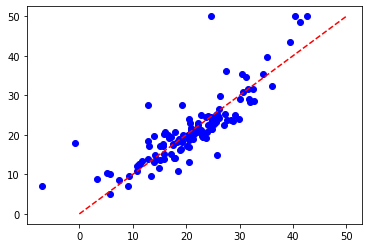

In [34]:
xx = np.linspace(0,max(y_test),1000)
plt.plot(preds, y_test, 'ob')
plt.plot(xx,xx,'--r')

## residuals: the error between true test values and predicted values

In [40]:
resid = y_test - preds

Text(0, 0.5, 'residuals')

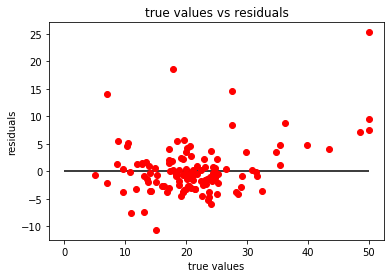

In [41]:
plt.plot(y_test, resid, 'or')
plt.hlines(0,0,max(y_test))
plt.title('true values vs residuals')
plt.xlabel('true values')
plt.ylabel('residuals')